In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/loan-prediction/Bank_Personal_Loan_Modelling.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


<h1>EDA</h1>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.shape

(5000, 14)

In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
corr_matrix=df.corr()

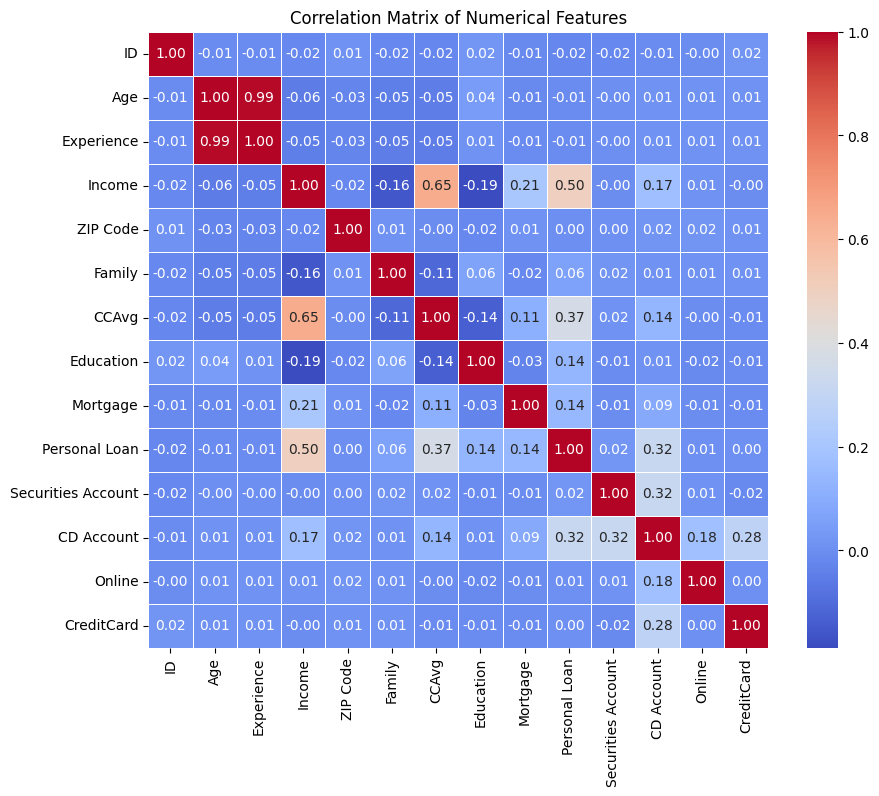

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

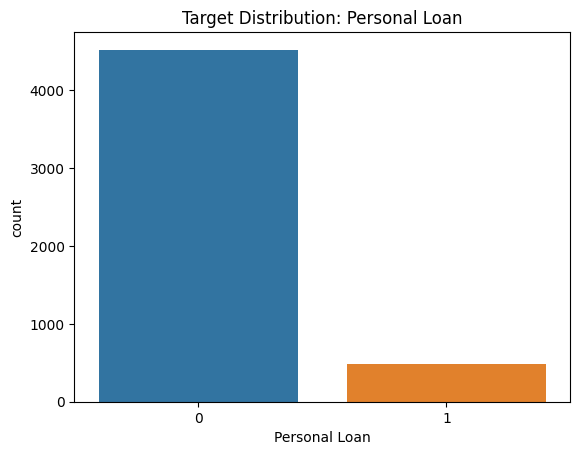

Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


In [9]:
sns.countplot(data=df, x='Personal Loan')
plt.title("Target Distribution: Personal Loan")
plt.show()
print(df['Personal Loan'].value_counts(normalize=True))

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


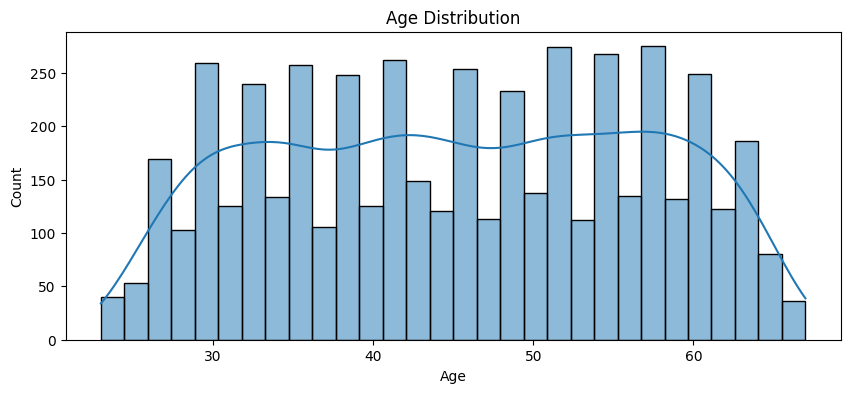

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


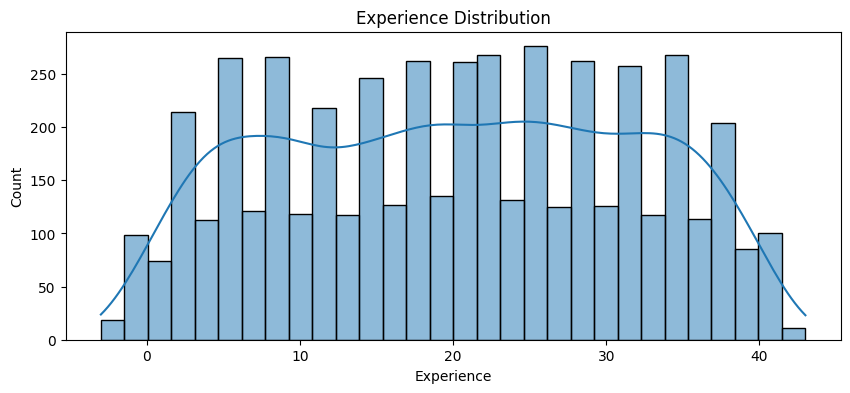

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


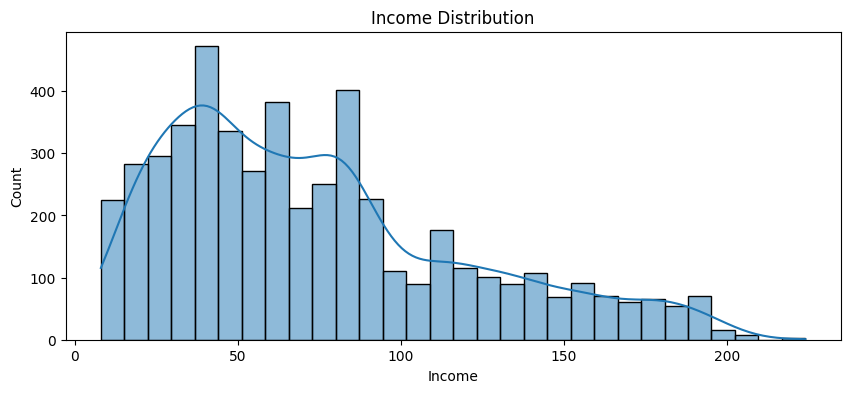

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


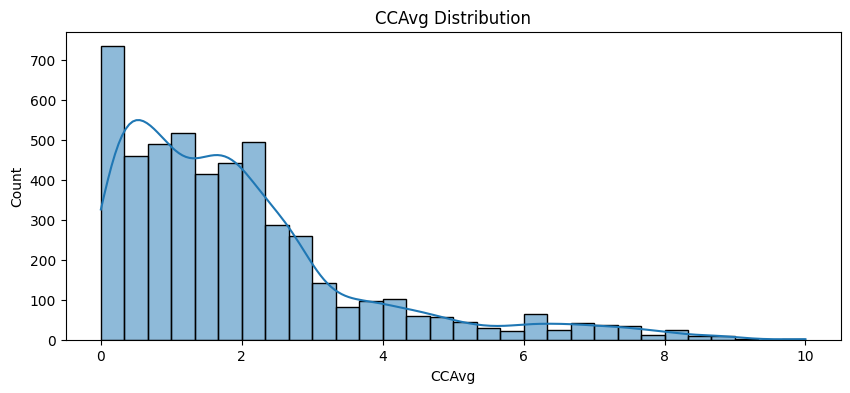

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


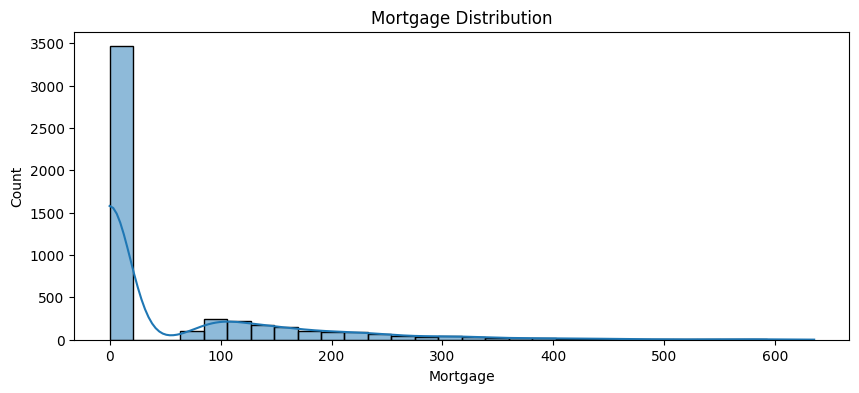

In [10]:
numerical = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

for col in numerical:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
    plt.show()

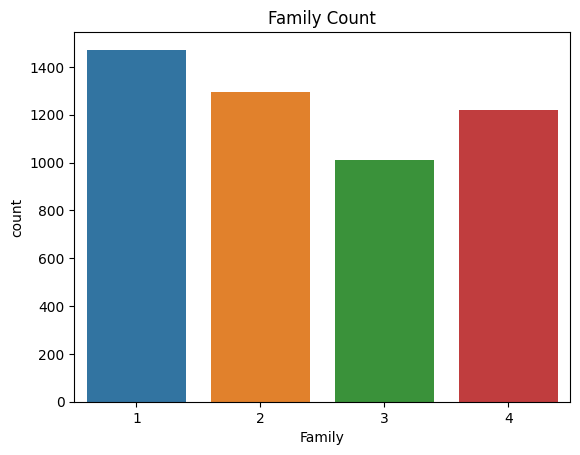

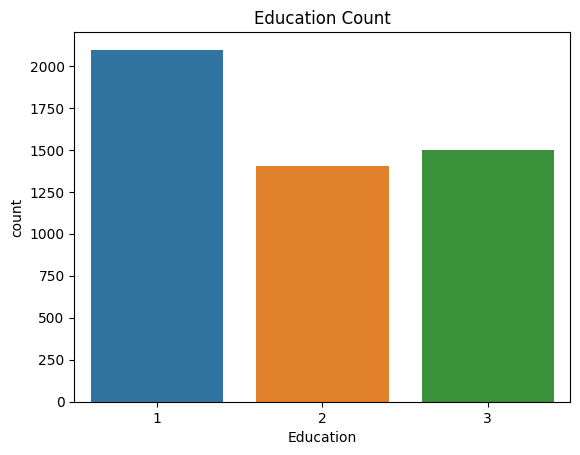

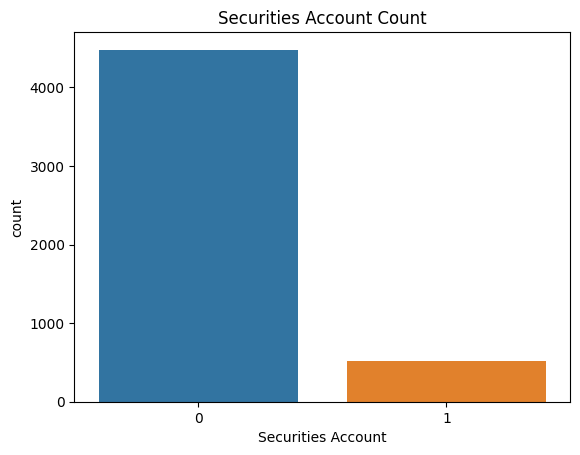

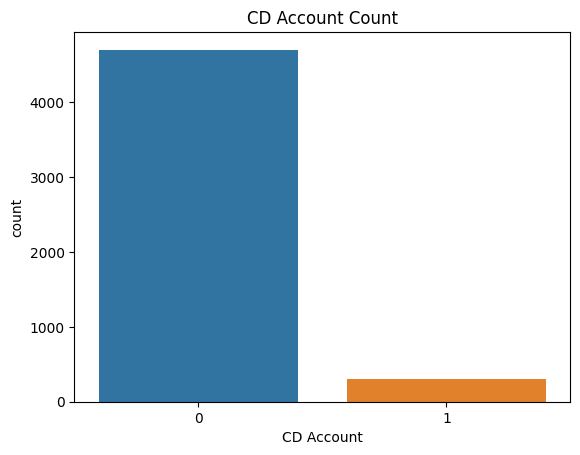

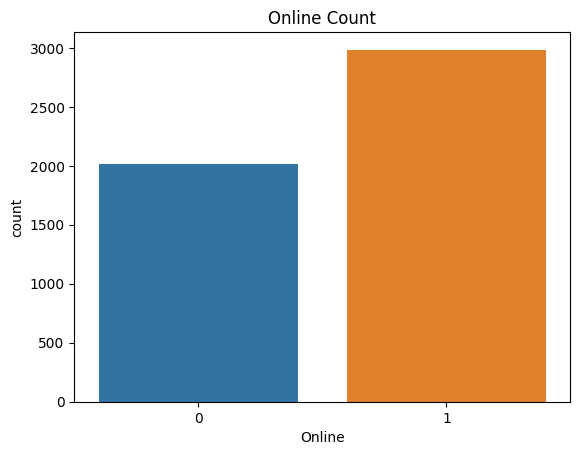

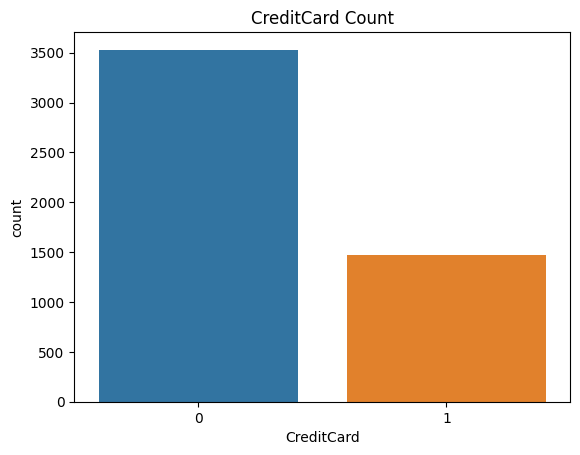

In [11]:
categorical = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

for col in categorical:
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Count')
    plt.show()

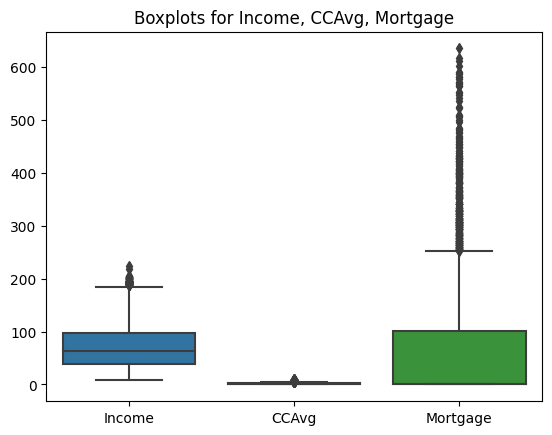

In [12]:
sns.boxplot(data=df[['Income', 'CCAvg', 'Mortgage']])
plt.title('Boxplots for Income, CCAvg, Mortgage')
plt.show()

In [13]:
df.reset_index(inplace=True)
df

,index,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [14]:
df.drop(['index'],axis=1,inplace=True)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [15]:
df2=pd.DataFrame(df,columns=['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'])
df2

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [16]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
norm1=scaler.fit_transform(df2)
df1=pd.DataFrame(norm1,columns=['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'])
df1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.0000,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.0,0.000000,1.0,0.0,0.0,0.0
1,0.0002,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.0,0.000000,1.0,0.0,0.0,0.0
2,0.0004,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0006,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.5,0.000000,0.0,0.0,0.0,0.0
4,0.0008,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.5,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.9992,0.136364,0.130435,0.148148,0.954731,0.000000,0.19,1.0,0.000000,0.0,0.0,1.0,0.0
4996,0.9994,0.159091,0.152174,0.032407,0.947174,1.000000,0.04,0.0,0.133858,0.0,0.0,1.0,0.0
4997,0.9996,0.909091,0.913043,0.074074,0.958463,0.333333,0.03,1.0,0.000000,0.0,0.0,0.0,0.0
4998,0.9998,0.954545,0.934783,0.189815,0.924242,0.666667,0.05,0.5,0.000000,0.0,0.0,1.0,0.0


In [17]:
extracted_col = df["Personal Loan"]
df1.insert(9, "Personal Loan", extracted_col)
df1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.0000,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.0,0.000000,0,1.0,0.0,0.0,0.0
1,0.0002,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.0,0.000000,0,1.0,0.0,0.0,0.0
2,0.0004,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.0,0.000000,0,0.0,0.0,0.0,0.0
3,0.0006,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.5,0.000000,0,0.0,0.0,0.0,0.0
4,0.0008,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.5,0.000000,0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.9992,0.136364,0.130435,0.148148,0.954731,0.000000,0.19,1.0,0.000000,0,0.0,0.0,1.0,0.0
4996,0.9994,0.159091,0.152174,0.032407,0.947174,1.000000,0.04,0.0,0.133858,0,0.0,0.0,1.0,0.0
4997,0.9996,0.909091,0.913043,0.074074,0.958463,0.333333,0.03,1.0,0.000000,0,0.0,0.0,0.0,0.0
4998,0.9998,0.954545,0.934783,0.189815,0.924242,0.666667,0.05,0.5,0.000000,0,0.0,0.0,1.0,0.0


In [18]:
from sklearn.model_selection import train_test_split

In [22]:
x =pd.DataFrame(df1,columns=['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg','Education', 'Mortgage', 'Securities Account','CD Account', 'Online', 'CreditCard'])
y= df1["Personal Loan"].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [23]:
print("x_train:",x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (3750, 13)
x_test: (1250, 13)
y_train: (3750, 1)
y_test: (1250, 1)


<h1>KNN</h1>

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
k=20
acc=np.zeros((k))
for i in range(1,k+1):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train.ravel())
  knn_pred=knn.predict(x_test)
  acc[i-1]=accuracy_score(y_test,knn_pred)

acc

array([0.964 , 0.9544, 0.9584, 0.9536, 0.956 , 0.9536, 0.9584, 0.9536,
       0.956 , 0.952 , 0.956 , 0.9488, 0.9504, 0.948 , 0.9488, 0.9464,
       0.948 , 0.9472, 0.948 , 0.948 ])

In [26]:
print(np.max(acc))
print(np.min(acc))

0.964
0.9432


In [63]:
K = 1
clf = KNeighborsClassifier (K)
clf.fit (x_train , y_train.ravel ())
y_pred = clf.predict (x_test)
knn_acc=accuracy_score (y_test , y_pred)
print ('Accuracy:', knn_acc)

Accuracy: 0.964


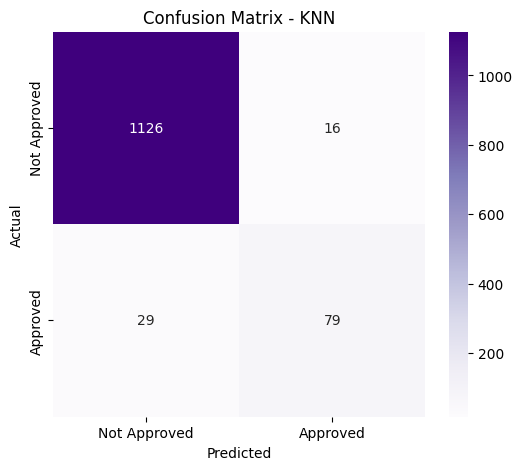

In [37]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Approved', 'Approved']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<H1>CatBoost</H1>

In [38]:
from catboost import CatBoostClassifier

In [40]:
clf = CatBoostClassifier(verbose =0, random_state=42)
clf.fit(x_train, y_train.ravel())
cbc_pred=clf.predict(x_test)
cbc_acc = accuracy_score(y_test, cbc_pred)

print(cbc_acc)

0.9888


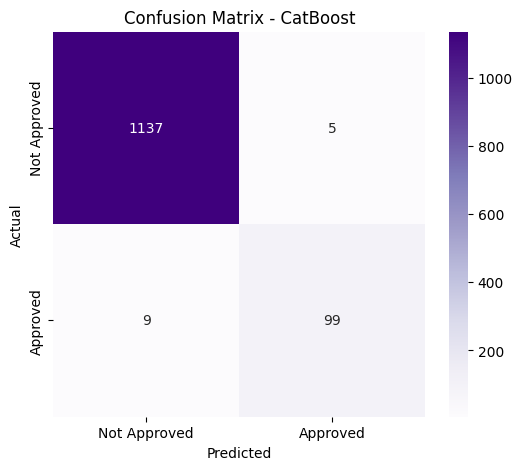

In [52]:
cm = confusion_matrix(y_test, cbc_pred)
labels = ['Not Approved', 'Approved']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - CatBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h1>LightGBMClassifier</h1>

In [45]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [48]:
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings ("ignore")

In [49]:
clf=LGBMClassifier(random_state=42)
clf.fit(x_train, y_train)
lgbm_pred=clf.predict(x_test)
acc_lgbm=accuracy_score(y_test, lgbm_pred)
print(acc_lgbm)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 372, number of negative: 3378
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1108
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.099200 -> initscore=-2.206145
[LightGBM] [Info] Start training from score -2.206145
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

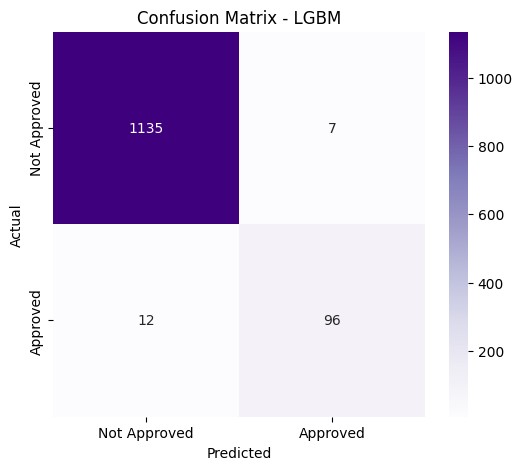

In [53]:
cm = confusion_matrix(y_test, lgbm_pred)
labels = ['Not Approved', 'Approved']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - LGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

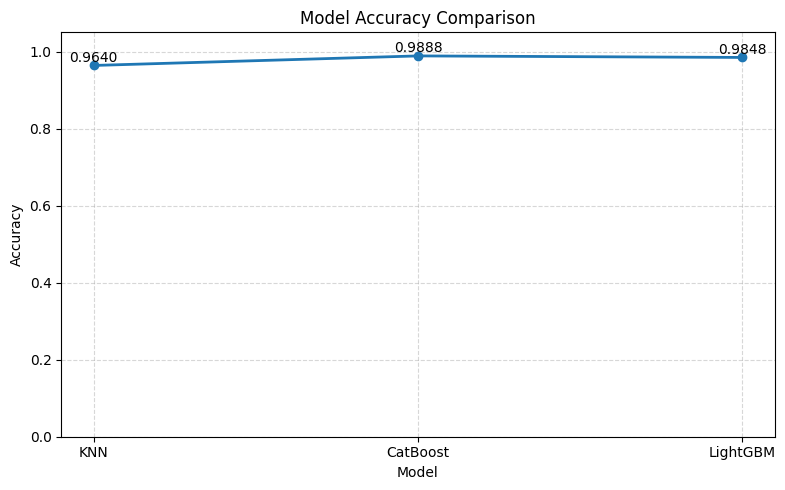

In [66]:
# Labels and accuracy values
labels = ['KNN', 'CatBoost', 'LightGBM']
accuracy_scores = [knn_acc, cbc_acc, acc_lgbm]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(labels, accuracy_scores, marker='o', color='tab:blue', linewidth=2)

# Styling
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.01, f'{score:.4f}', ha='center', fontsize=10)

plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [67]:
from sklearn.metrics import f1_score

In [68]:
knn_f1 = f1_score(y_test, y_pred)
print(knn_f1)

0.7783251231527094


In [69]:
cbc_f1=f1_score(y_test,cbc_pred)
print(cbc_f1)

0.9339622641509433


In [70]:
lgbm_f1=f1_score(y_test, lgbm_pred)
print(lgbm_f1)

0.909952606635071


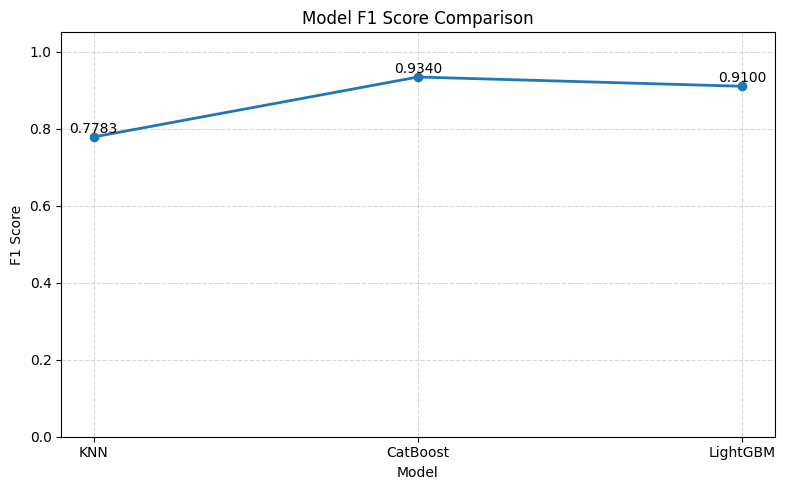

In [75]:
# Labels and accuracy values
labels = ['KNN', 'CatBoost', 'LightGBM']
f1_scores = [knn_f1, cbc_f1, lgbm_f1]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(labels, f1_scores, marker='o', color='tab:blue', linewidth=2)

# Styling
for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.01, f'{score:.4f}', ha='center', fontsize=10)

plt.title('Model F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()